In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
# IMPORTANT: The dataset uses semicolon separators!
df = pd.read_csv("student_data.csv", sep=";")

print("Shape:", df.shape)
display(df.head())


Shape: (4424, 35)


,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Output
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
print("\n--- Columns ---")
print(df.columns)

print("\n--- Data Types ---")
print(df.dtypes)

print("\n--- Missing Values ---")
print(df.isna().sum())



--- Columns ---
Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without eva

In [4]:
print("\n--- Numerical Summary ---")
display(df.describe())

print("\n--- Categorical Summary ---")
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



--- Numerical Summary ---


,Marital status,Application mode,Application order,Course,evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000



--- Categorical Summary ---

Column: Output
Output
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [5]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numerical Columns: ['Marital status', 'Application mode', 'Application order', 'Course', 'evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
Categorical Columns: ['Output']


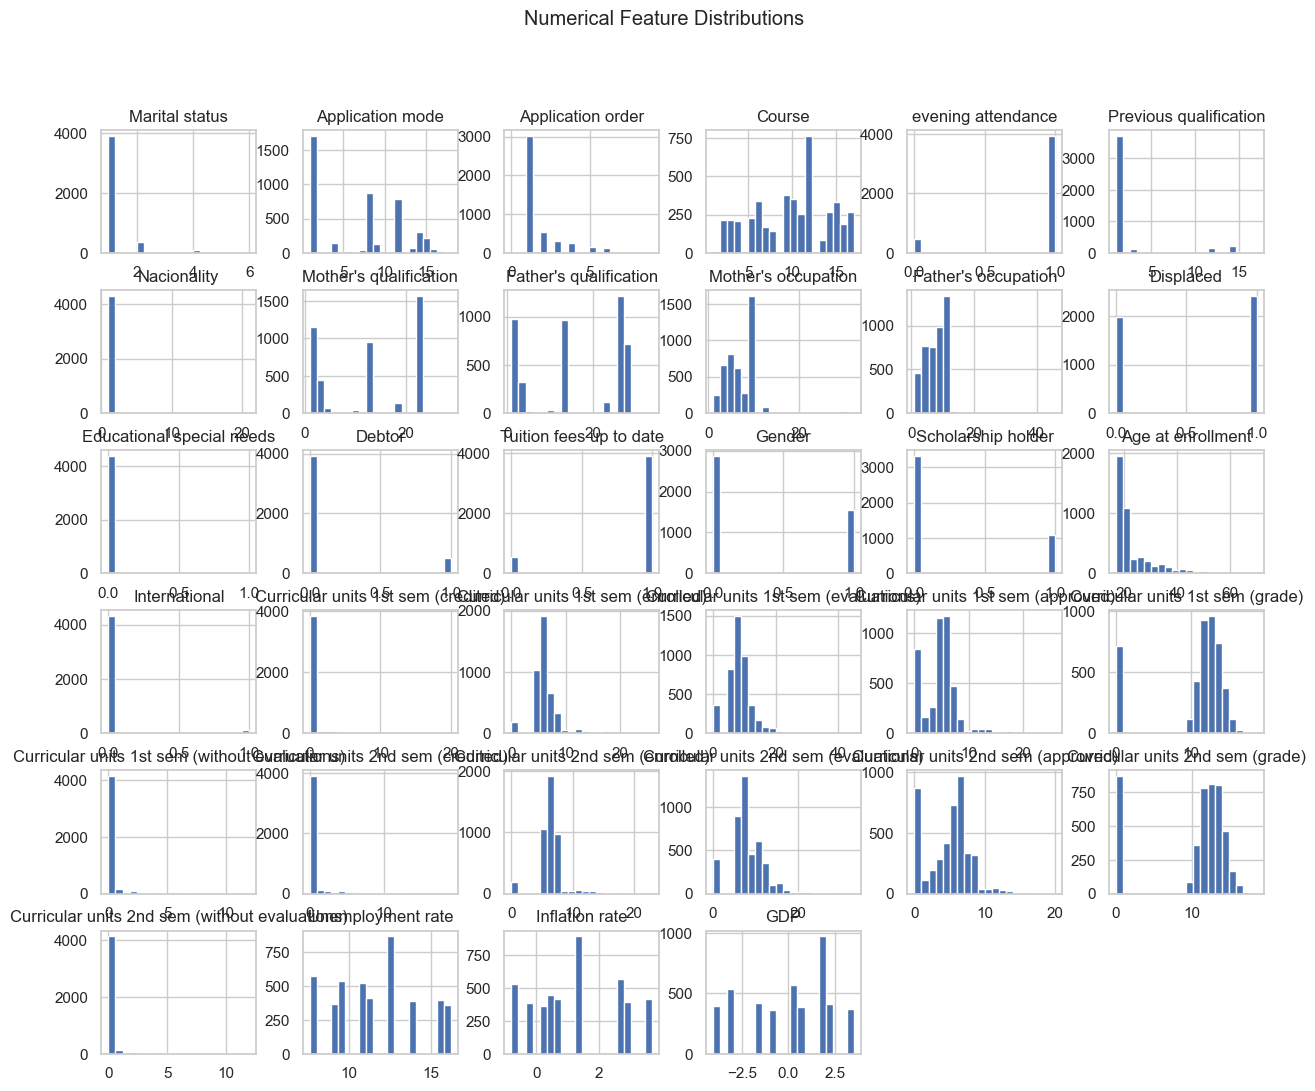

In [6]:
df[num_cols].hist(bins=20, figsize=(15, 12))
plt.suptitle("Numerical Feature Distributions")
plt.show()


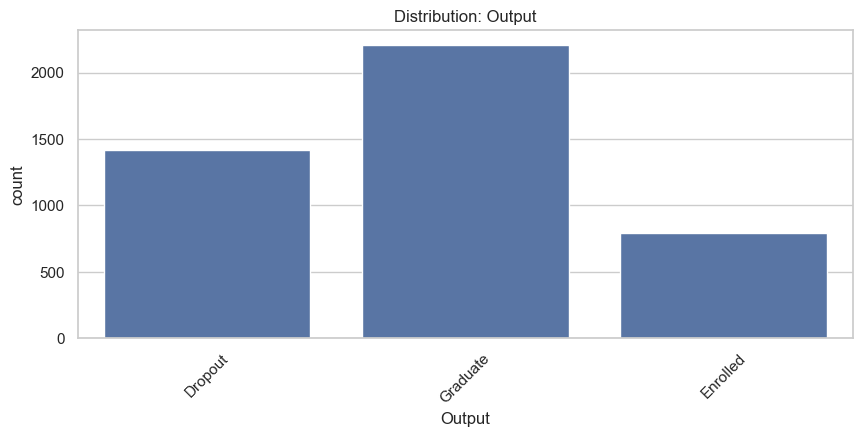

In [7]:
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution: {col}")
    plt.xticks(rotation=45)
    plt.show()


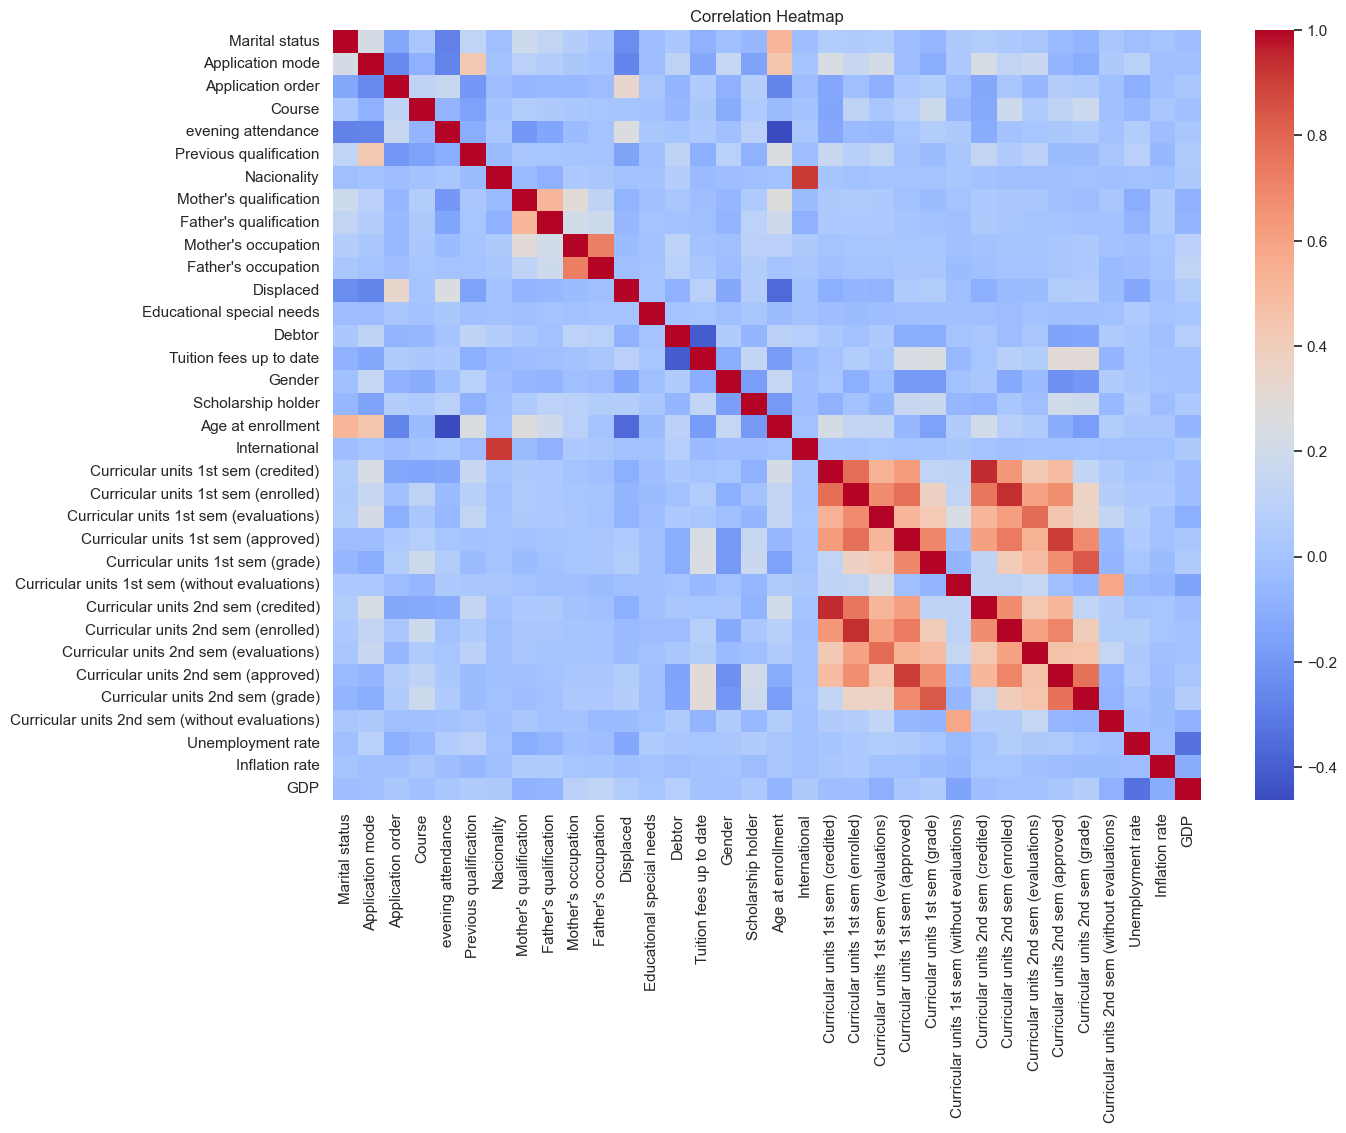

In [8]:
plt.figure(figsize=(14, 10))
sns.heatmap(df[num_cols].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [9]:
print(cat_cols)
TARGET = "Output"
print(df[TARGET].value_counts())



['Output']
Output
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


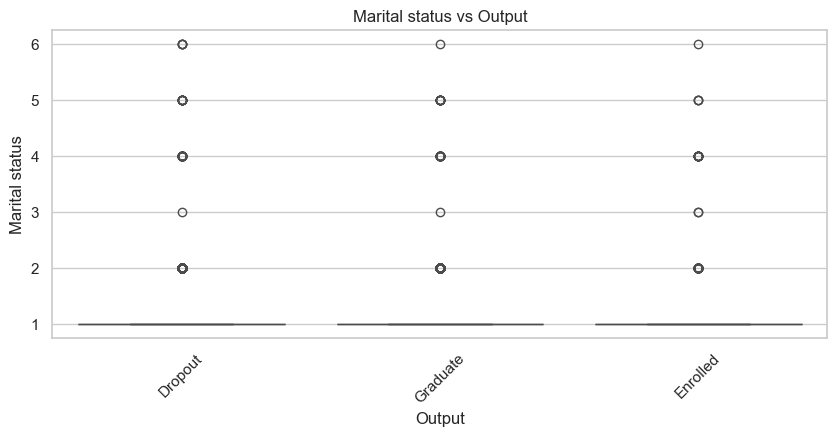

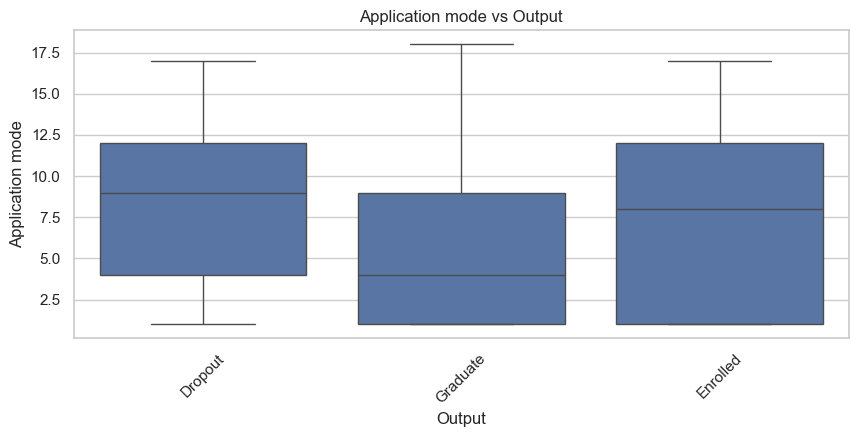

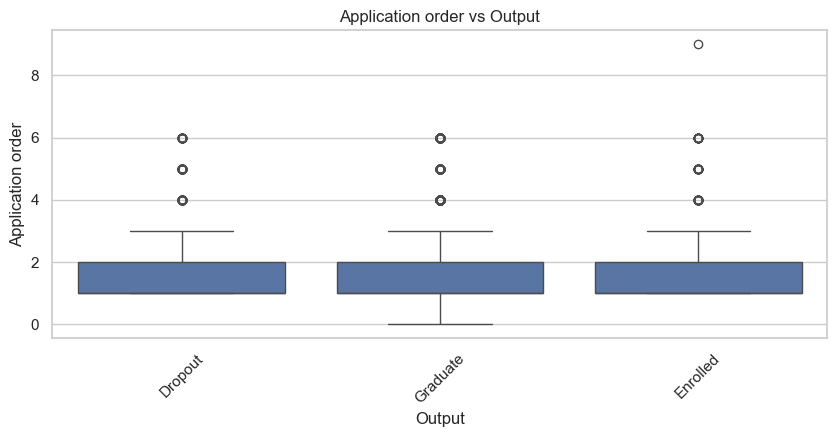

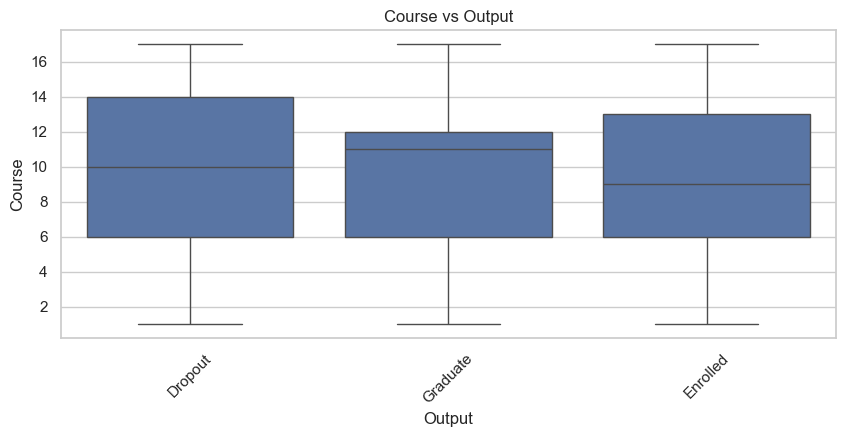

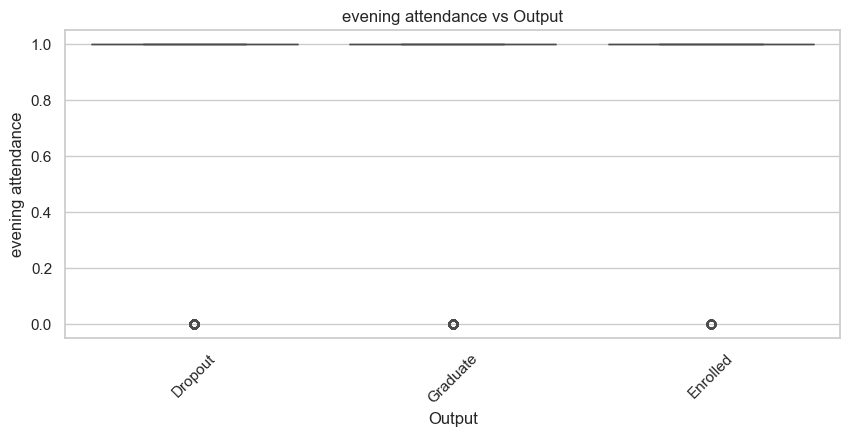

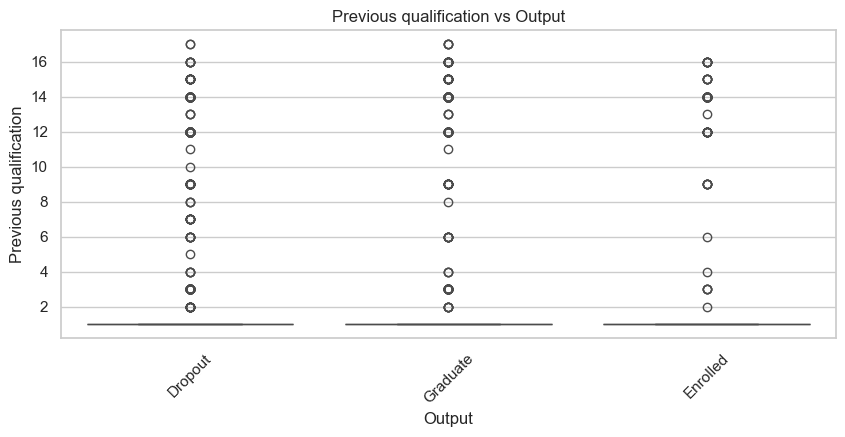

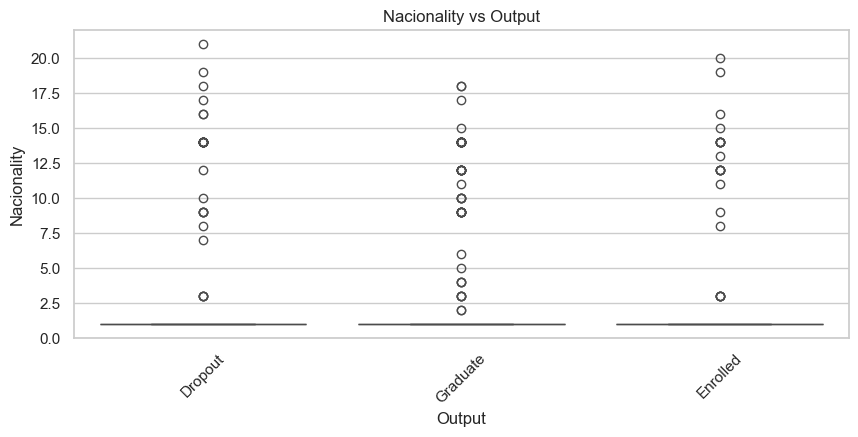

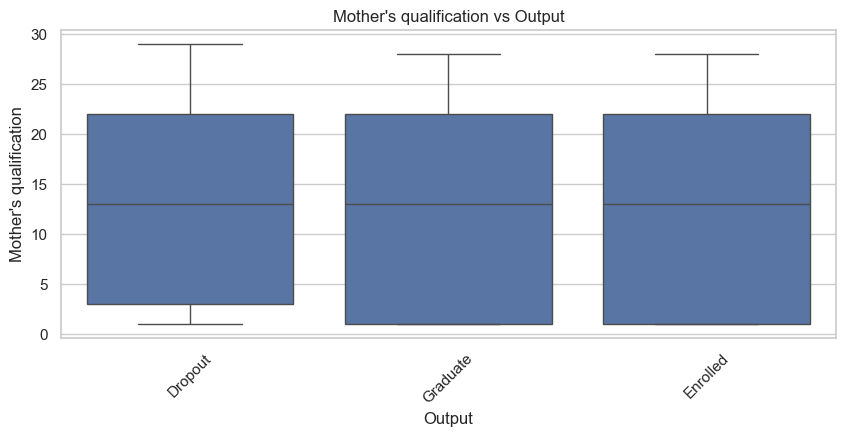

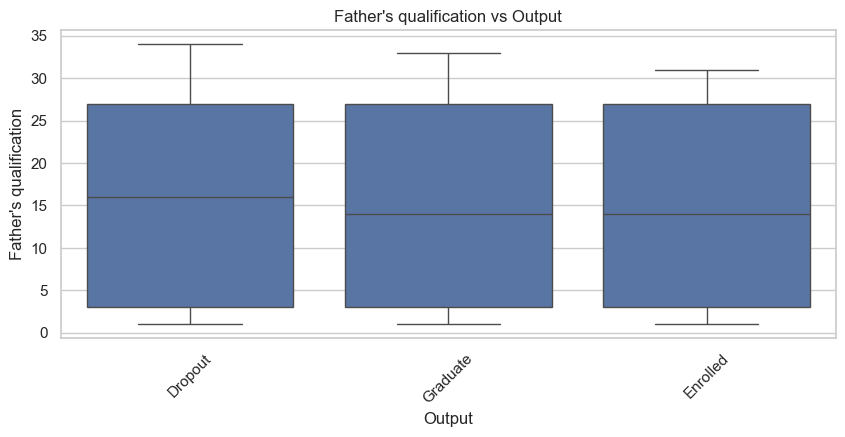

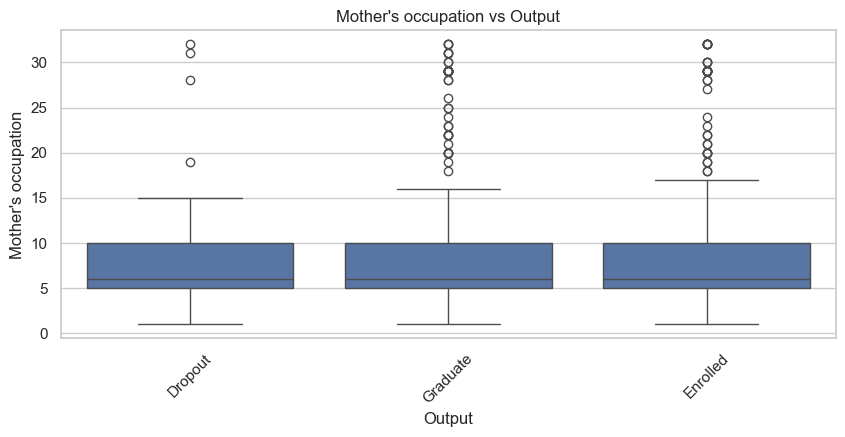

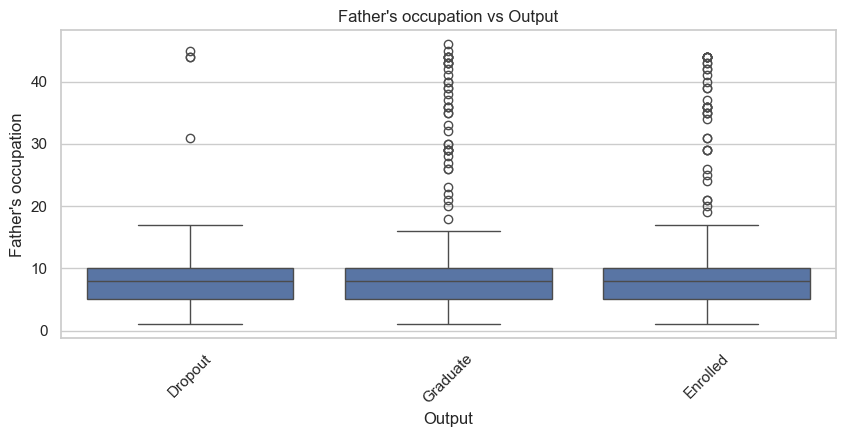

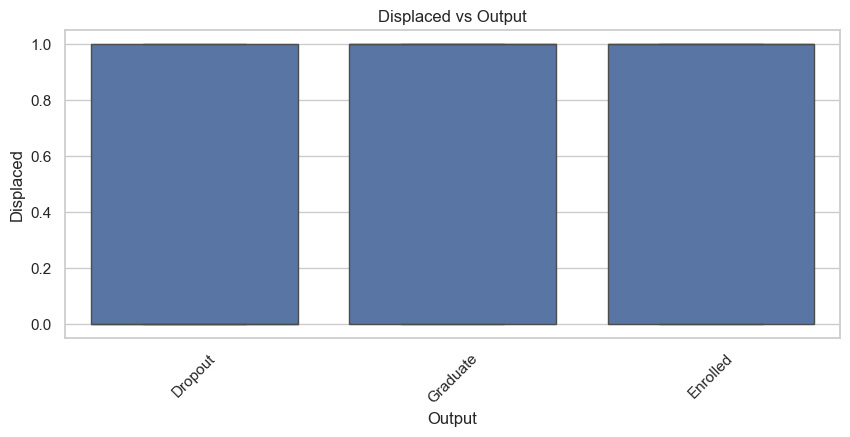

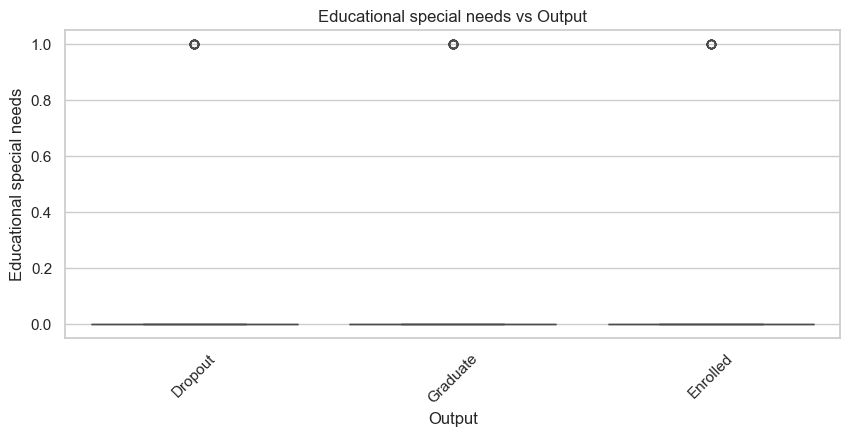

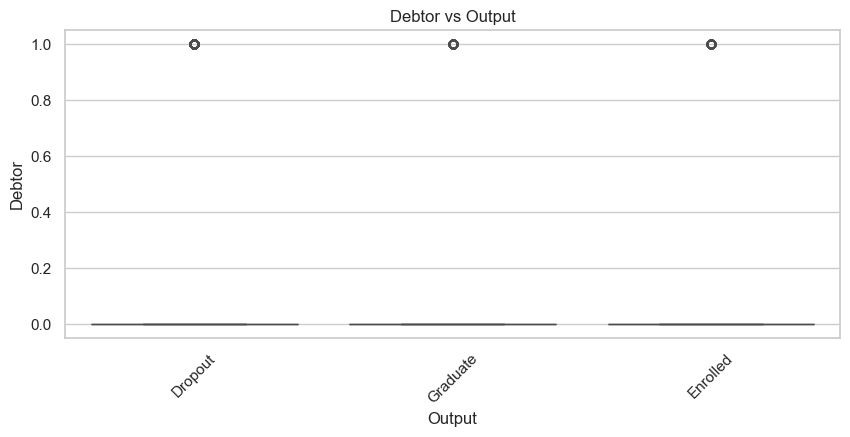

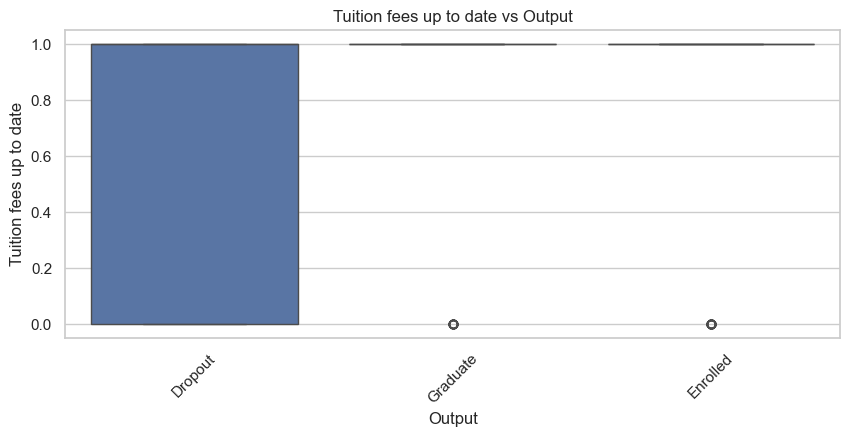

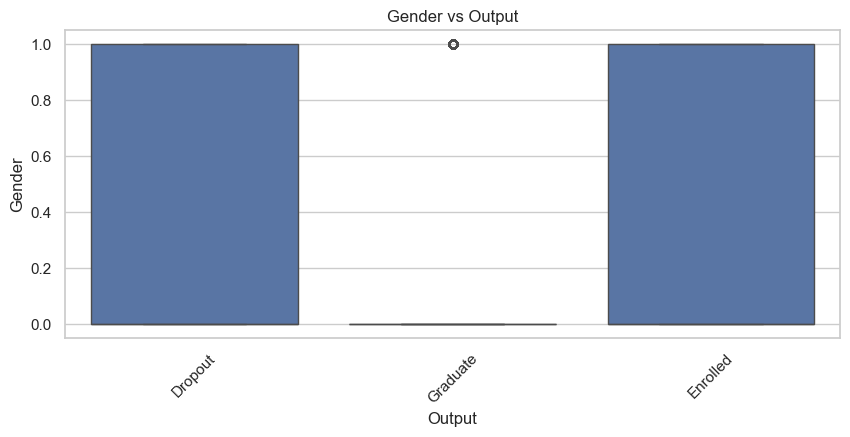

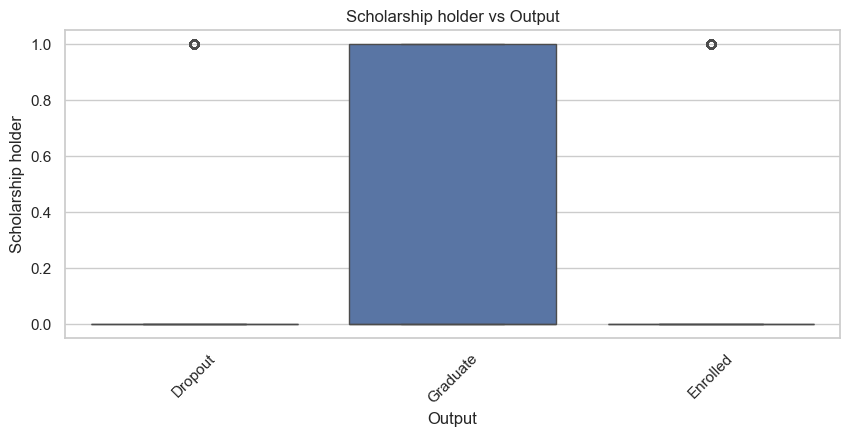

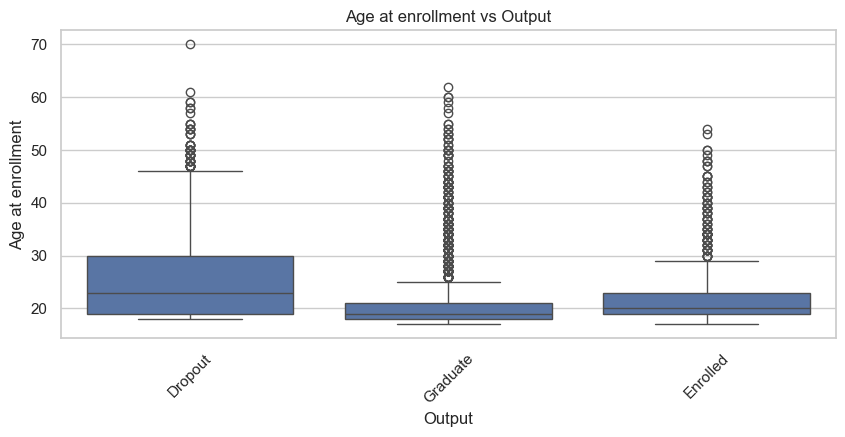

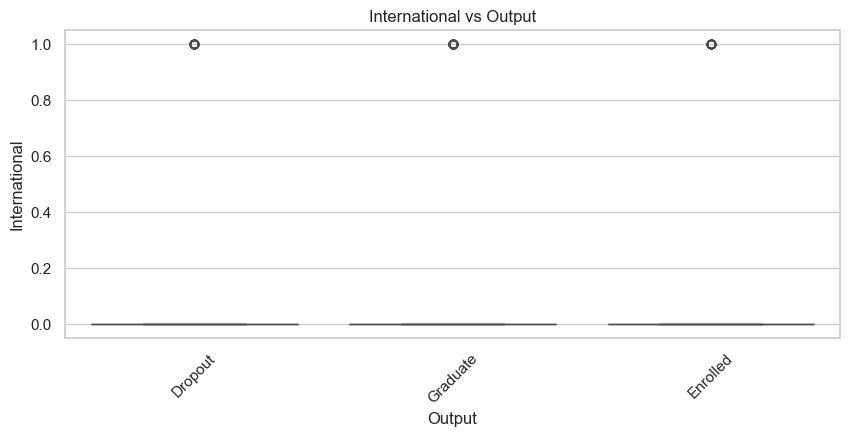

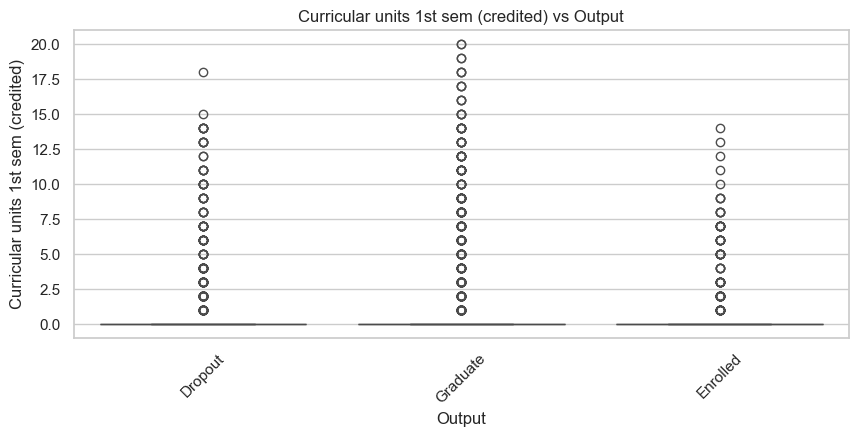

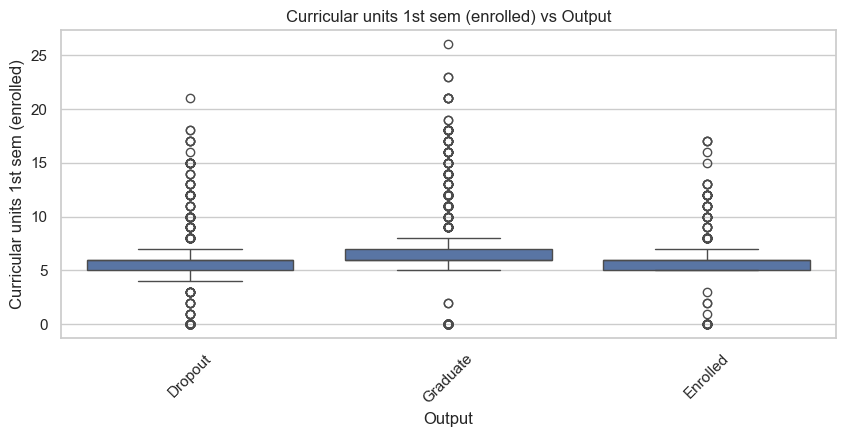

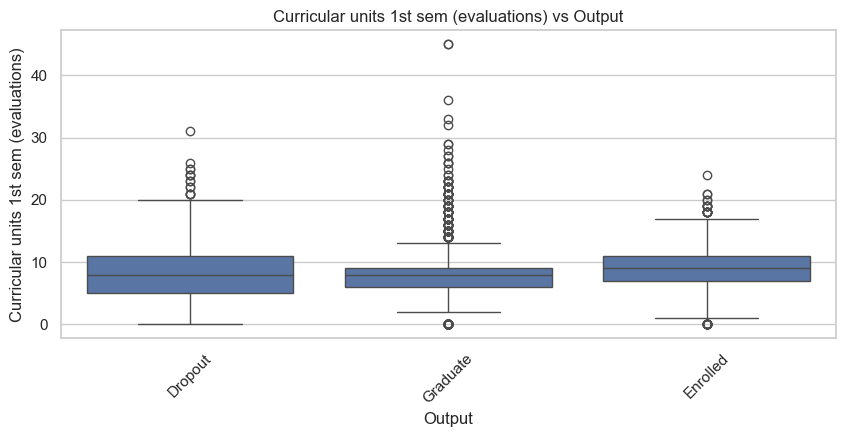

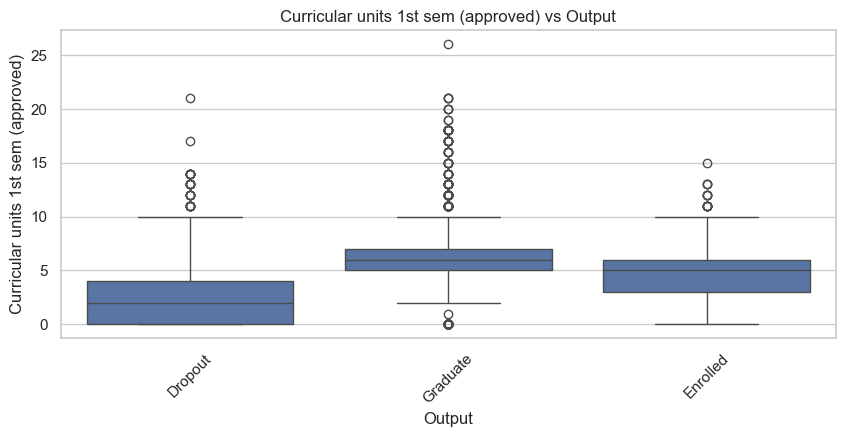

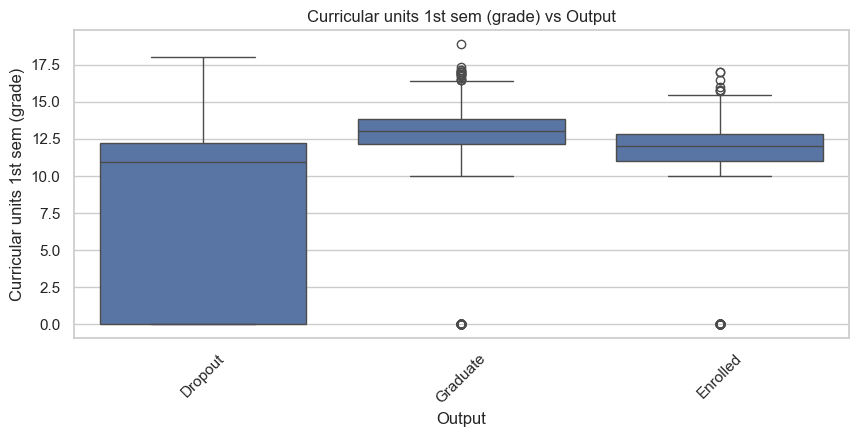

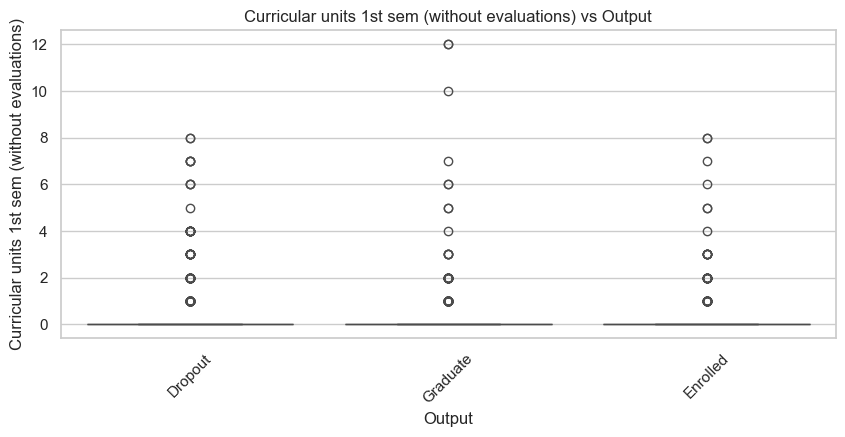

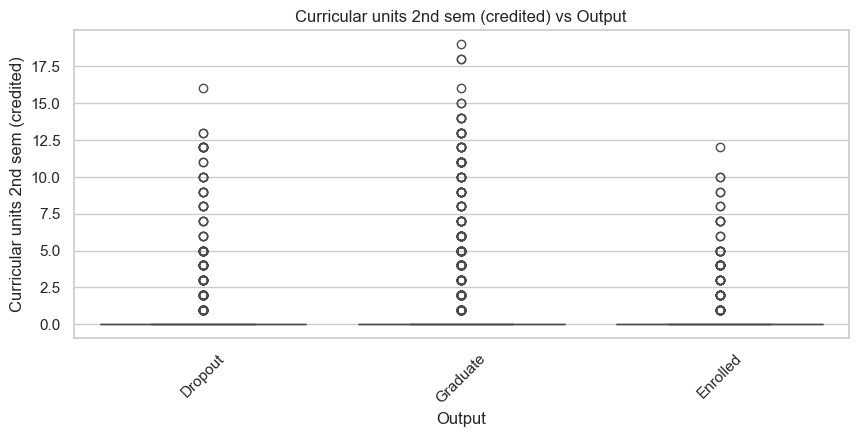

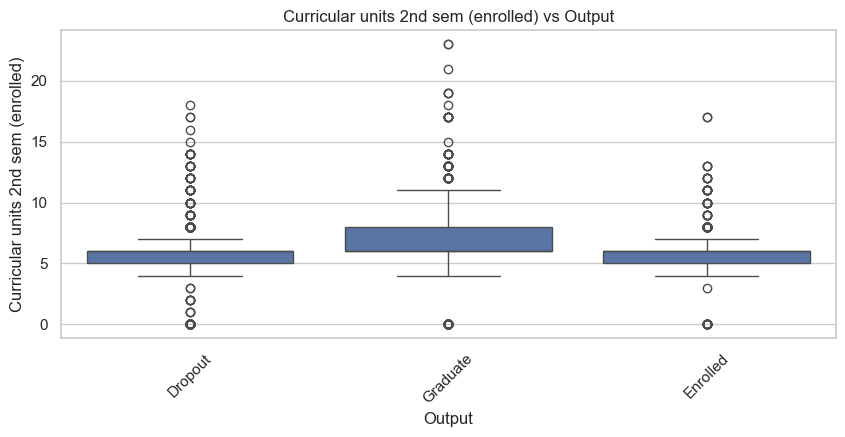

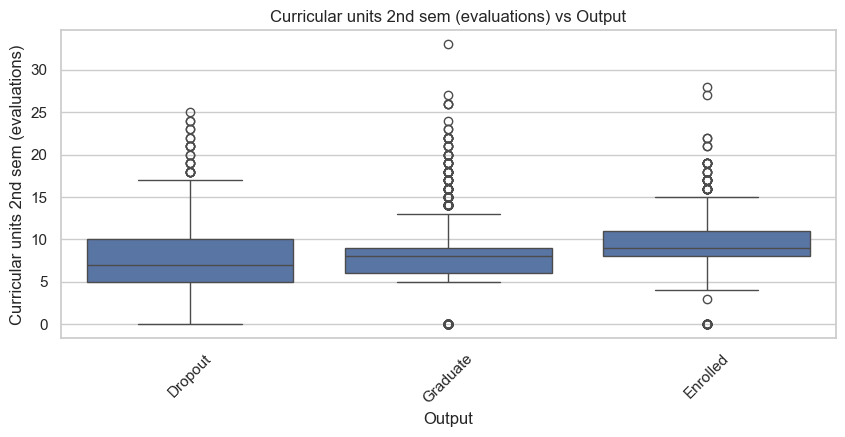

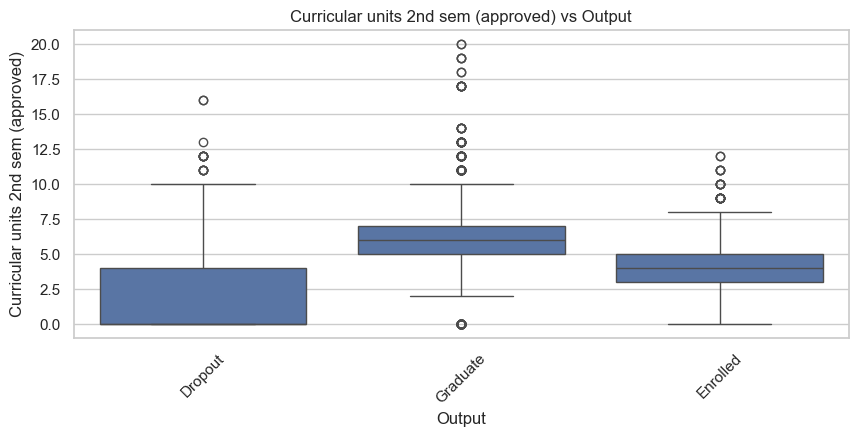

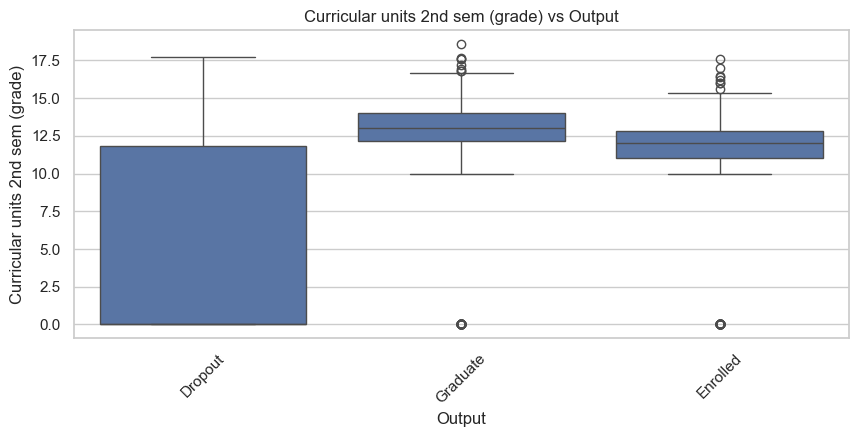

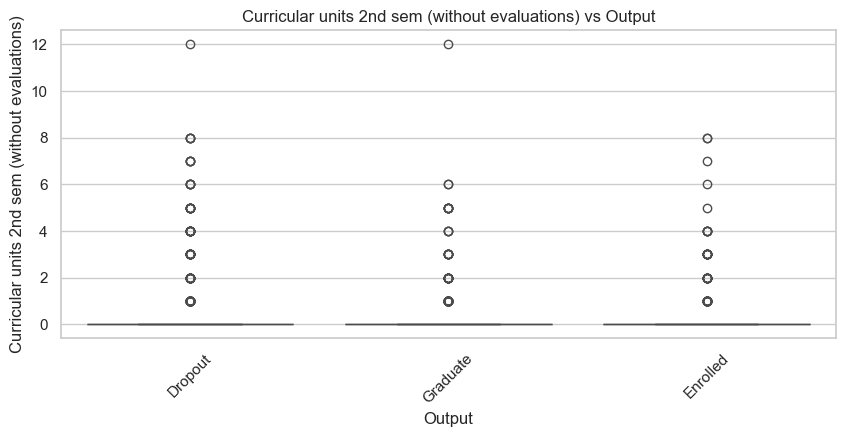

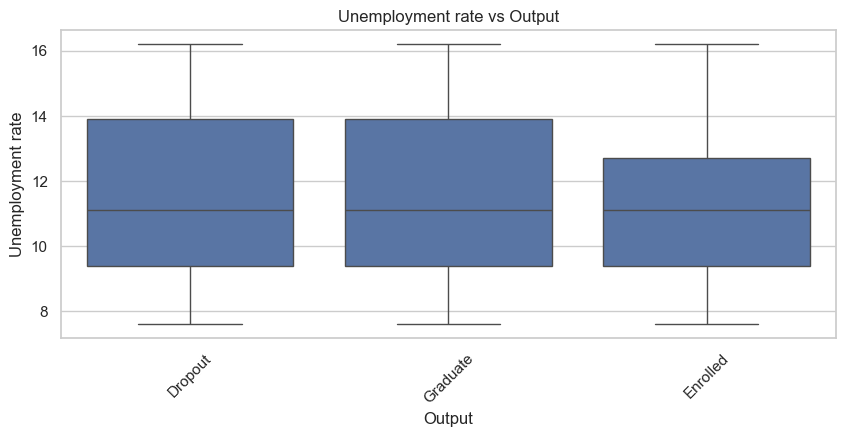

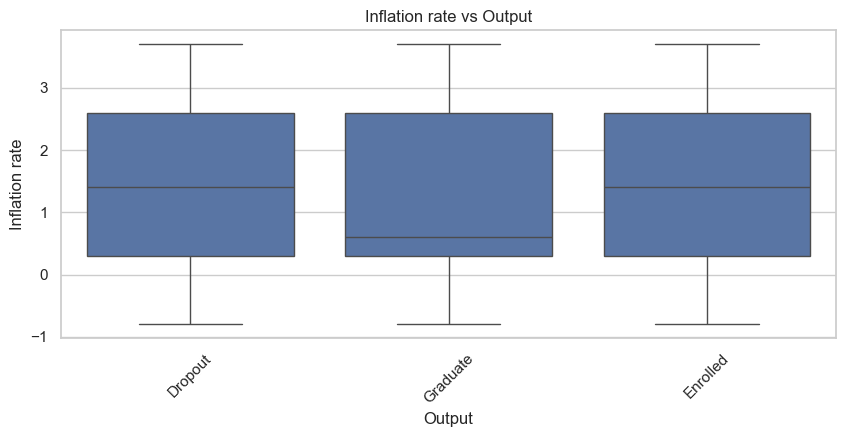

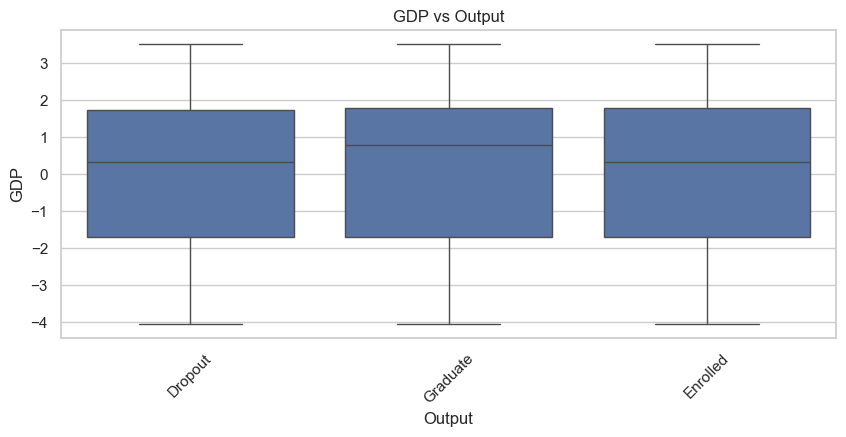

In [10]:
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x=TARGET, y=col)
    plt.title(f"{col} vs {TARGET}")
    plt.xticks(rotation=45)
    plt.show()


In [11]:
for col in cat_cols:
    if col == TARGET:
        continue
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, hue=TARGET)
    plt.title(f"{col} vs {TARGET}")
    plt.xticks(rotation=45)
    plt.show()


In [12]:
if "Curricular units 1st sem (enrolled)" in df.columns:
    df["Pass rate 1st sem"] = (
        df["Curricular units 1st sem (approved)"] /
        df["Curricular units 1st sem (enrolled)"].replace(0, np.nan)
    )

if "Curricular units 2nd sem (enrolled)" in df.columns:
    df["Pass rate 2nd sem"] = (
        df["Curricular units 2nd sem (approved)"] /
        df["Curricular units 2nd sem (enrolled)"].replace(0, np.nan)
    )

display(df[["Pass rate 1st sem", "Pass rate 2nd sem"]].head())


,Pass rate 1st sem,Pass rate 2nd sem
0,NaN,NaN
1,1.000000,1.000000
2,0.000000,0.000000
3,1.000000,0.833333
4,0.833333,1.000000


In [13]:
X = df.drop(TARGET, axis=1)
y = df[TARGET]

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numerical:", num_cols)
print("Categorical:", cat_cols)


Numerical: ['Marital status', 'Application mode', 'Application order', 'Course', 'evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Pass rate 1st sem', 'Pass rate 2nd sem']
Categorical: []


In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

model = RandomForestClassifier(random_state=42)

clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

     Dropout       0.83      0.78      0.80       284
    Enrolled       0.57      0.38      0.45       159
    Graduate       0.80      0.92      0.86       442

    accuracy                           0.78       885
   macro avg       0.73      0.69      0.70       885
weighted avg       0.77      0.78      0.77       885

Confusion Matrix:
[[222  21  41]
 [ 38  60  61]
 [  9  25 408]]


In [16]:
ohe = clf.named_steps["preprocessor"].named_transformers_["cat"]
ohe_names = ohe.get_feature_names_out(cat_cols)

feature_names = num_cols + list(ohe_names)
importances = clf.named_steps["model"].feature_importances_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8, 12))
feat_imp.head(20).plot(kind="barh")
plt.title("Top 20 Feature Importances")
plt.gca().invert_yaxis()
plt.show()

feat_imp.head(20)


NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.